# Machine Learning Practice - Classification
## Milestone Project 1: Predict Heart Disease

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve, classification_report

In [3]:
df = pd.read_csv("data/heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
np.sum(df.isna())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

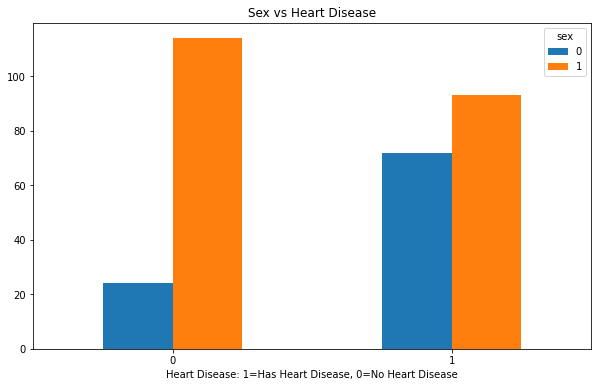

In [23]:
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6))
plt.title("Sex vs Heart Disease")
plt.xlabel("Heart Disease: 1=Has Heart Disease, 0=No Heart Disease")
plt.xticks(rotation=0)
plt.show()

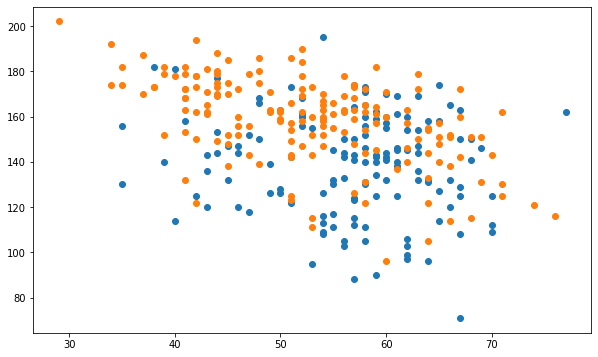

In [29]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x=df.age[df.target == 0], y=df.thalach[df.target == 0])
ax.scatter(x=df.age[df.target == 1], y=df.thalach[df.target == 1])

Text(0.5, 1.0, 'Corrrelation Matrix')

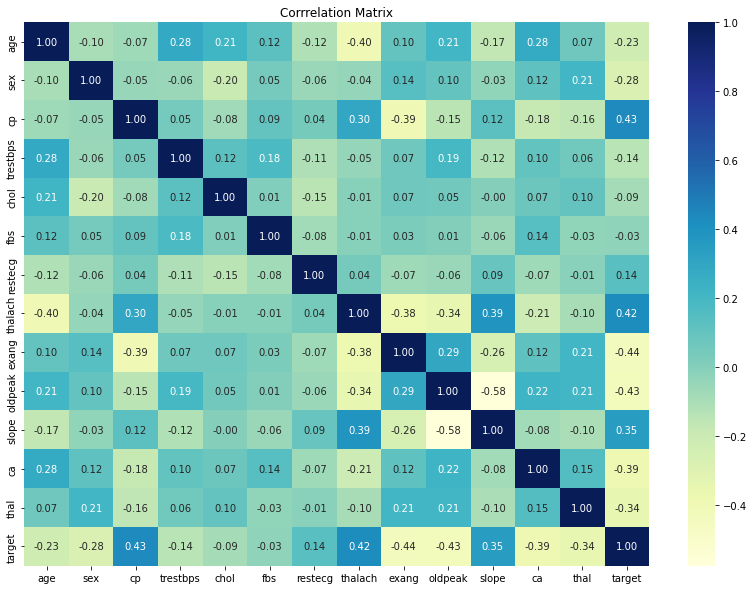

In [47]:
fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="YlGnBu")
ax.set_title("Corrrelation Matrix")

/Users/redhaazmei/Documents/ML/machine-learning/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/redhaazmei/Documents/ML/machine-learning/env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/redhaazmei/Documents/ML/machine-learning/env/lib/python3.

LogisticRegression() score: 88.52%
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

RandomForestClassifier() score: 85.25%
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

KNeighborsClassifier() score: 68.85%
              precision    recall  f1-score   support

           0       0.69      0.62      0.65        29
           1       0.69      0.75      0.72        32

    accuracy                           0.69        61
   macro avg     

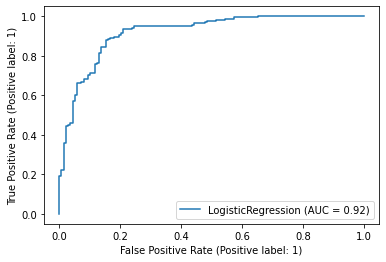

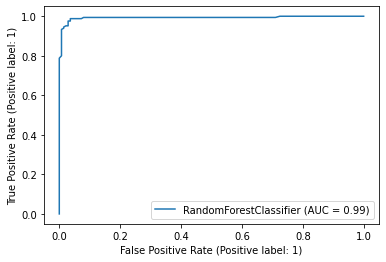

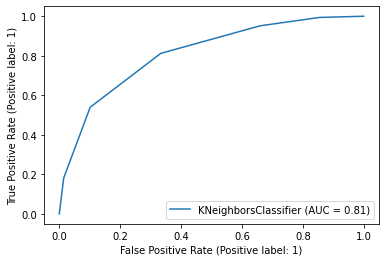

In [70]:
np.random.seed(42)

X = df.drop("target", axis=1)
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

models = [LogisticRegression(), RandomForestClassifier(), KNeighborsClassifier()]

for model in models:
    model.fit(X_train, y_train)
    score = round(model.score(X_test, y_test) * 100, 2)
    y_preds = model.predict(X_test)
    plot_roc_curve(model, X, y)
    print(f"{model} score: {score}%")
    print(classification_report(y_test, y_preds))

In [76]:
# Hyperparameter tuning for Logistic Regression and Random Forset Classifier using RandomizedSearchCV
np.random.seed(42)
logreg_grid = {"C": np.logspace(-4, 4, 20), "solver": ["liblinear"]}

rs_logreg = RandomizedSearchCV(LogisticRegression(), param_distributions=logreg_grid, cv=5, n_iter=20)
rs_logreg.fit(X_train, y_train)
rs_logreg.score(X_test, y_test) * 100

88.52459016393442

In [81]:
rs_logreg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [83]:
np.random.seed(42)
rf_grid = {"n_estimators": np.arange(10, 1000, 50), "max_depth": np.arange(2, 20, 2), 
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(2, 20, 2)}

rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid, cv=5, n_iter=20)
rs_rf.fit(X_train, y_train)
rs_rf.score(X_test, y_test) * 100

86.88524590163934

In [84]:
rs_rf.best_params_

{'n_estimators': 260,
 'min_samples_split': 16,
 'min_samples_leaf': 16,
 'max_depth': 8}

Text(25.5, 0.5, 'True Label')

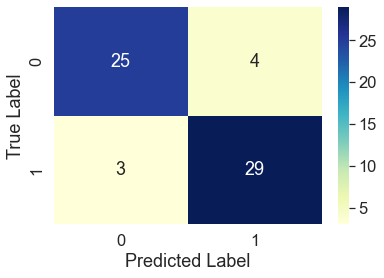

In [117]:
y_preds = rs_logreg.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_preds)
fig, ax = plt.subplots()
sns.set(font_scale=1.5)
ax = sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

In [118]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [119]:
rs_logreg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [120]:
clf = LogisticRegression(C=rs_logreg.best_params_["C"], solver=rs_logreg.best_params_["solver"])

In [122]:
# Scoring metrics
scorings = ["accuracy", "precision", "recall", "f1"]

scores = dict()

for score in scorings:
    cv_accuracy = cross_val_score(clf, X, y, cv=5, scoring=score)
    mean_score = round(np.mean(cv_accuracy)*100, 2)
    scores.update({score: mean_score})
    print(f"{score}: {mean_score}%")

accuracy: 84.8%
precision: 82.16%
recall: 92.73%
f1: 87.05%


In [124]:
scores

{'accuracy': 84.8, 'precision': 82.16, 'recall': 92.73, 'f1': 87.05}

In [129]:
scores_df = pd.DataFrame(scores, index=[0])
scores_df

,accuracy,precision,recall,f1
0,84.8,82.16,92.73,87.05


(array([0, 1, 2, 3]),
 [Text(0, 0, 'accuracy'),
  Text(1, 0, 'precision'),
  Text(2, 0, 'recall'),
  Text(3, 0, 'f1')])

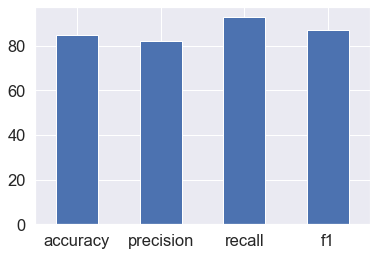

In [134]:
scores_df.T.plot(kind="bar", legend=False)
plt.xticks(rotation=0)

In [135]:
# Finding Feature Importance

clf = LogisticRegression()
clf.fit(X_train, y_train)

/Users/redhaazmei/Documents/ML/machine-learning/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [137]:
clf.coef_

array([[ 0.0079798 , -1.20108961,  0.77505567, -0.01096507, -0.00141446,
        -0.00150939,  0.5356976 ,  0.02708072, -0.82901721, -0.67634558,
         0.61876698, -0.751114  , -1.01557369]])

In [142]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.007979796032163096,
 'sex': -1.2010896092617993,
 'cp': 0.775055674436652,
 'trestbps': -0.01096506683461827,
 'chol': -0.0014144585602128132,
 'fbs': -0.0015093923292962496,
 'restecg': 0.5356975976146816,
 'thalach': 0.02708071579776176,
 'exang': -0.8290172117475746,
 'oldpeak': -0.6763455783224119,
 'slope': 0.6187669768927446,
 'ca': -0.7511139987086022,
 'thal': -1.0155736903335382}

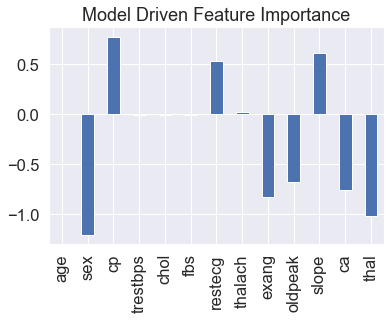

In [151]:
pd.DataFrame(feature_dict, index=[0]).T.plot(kind="bar", legend=False)
plt.title("Model Driven Feature Importance")
plt.show()